<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 7

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* [Car figure](https://korkortonline.se/en/theory/reaction-braking-stopping/)

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
        ```
        git reset --hard origin/main
        ```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Understanding the Posterior Predictive Distribution (PPD)
    - Similar example to Lecture 6 but now with a Gaussian prior.

**Reading material**: This notebook

## In this Lecture...

### Summary of the model

1. The **observation distribution**:

$$
p(y|z) = \mathcal{N}\left(y | \mu_{y|z}=w z+b, \sigma_{y|z}^2\right) = \frac{1}{C_{y|z}} \exp\left[ -\frac{1}{2\sigma_{y|z}^2}(y-\mu_{y|z})^2\right]
$$

where $C_{y|z} = \sqrt{2\pi \sigma_{y|z}^2}$ is the **normalization constant** of the Gaussian pdf, and where $\mu_{y|z}=w z+b$, with $w$, $b$ and $\sigma_{y|z}^2$ being constants.

2. <font color='blue'>but now assuming a different **prior distribution**</font>: $p(z) = \mathcal{N}\left(z| \overset{\scriptscriptstyle <}{\mu}_z=3, \overset{\scriptscriptstyle <}{\sigma}_z^2=2^2
\right)$

As in Lecture 6, we start by using Bayes' rule applied to data to determine the <font color='green'>posterior</font>:

$\require{color}$
$$
{\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}
$$

The <font color='blue'>likelihood</font> is the same as in Lecture 6:

$$
{\color{blue}p(y=\mathcal{D}_y | z)} = \frac{1}{|w|^N} \cdot C \cdot \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[ -\frac{1}{2\sigma^2}(z-\mu)^2\right]
$$

where $\mu = \frac{w^2\sigma^2}{\sigma_{y|z}^2} \sum_{i=1}^N \mu_i = \frac{\sum_{i=1}^N y_i}{w N}-\frac{b}{w}$

$\sigma^2 = \frac{\sigma_{y|z}^2}{w^2 N}$, and

$C = \frac{1}{2\pi^{(N-1)/2}} \sqrt{\frac{\sigma^2}{\left( \frac{\sigma_{y|z}^2}{w^2}\right)^N}}
$

But now the marginal likelihood is different from Lecture 6 because we have a different prior:

$$
p(y=\mathcal{D}_y) = \frac{C\cdot C_M}{|w|^N}
$$

where $C_M = \frac{1}{\sqrt{2\pi\left(\sigma^2+\overset{\scriptscriptstyle <}{\sigma}_z^2\right)}} \exp\left[-\frac{1}{2\left(\sigma^2+\overset{\scriptscriptstyle <}{\sigma}_z^2\right)}\left(\mu - \overset{\scriptscriptstyle <}{\mu}_z\right)^2 \right]$.

(Algebra to get this result is in the notes below.)

#### Note: calculation of the marginal likelihood for Homework of Lecture 6

$$\begin{align}
p(y=\mathcal{D}_y) &= \int p(y=\mathcal{D}_y | z) p(z) dz \\
&= \int \frac{1}{|w|^N} C \cdot \mathcal{N}(z|\mu, \sigma^2)\cdot \mathcal{N}\left(z| \overset{\scriptscriptstyle <}{\mu}_z, \overset{\scriptscriptstyle <}{\sigma}_z^2\right) dz\\
&= \frac{C}{|w|^N} \int C_M\mathcal{N}\left(z\left|\frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}} \left( \frac{\mu}{\sigma^2} + \frac{\overset{\scriptscriptstyle <}{\mu}_z}{\overset{\scriptscriptstyle <}{\sigma}_z^2}\right), \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}}\right.\right) dz = \frac{C\cdot C_M}{|w|^N} \\
\end{align}
$$

where $C_M = \frac{1}{\sqrt{2\pi\left(\sigma^2+\overset{\scriptscriptstyle <}{\sigma}_z^2\right)}} \exp\left[-\frac{1}{2\left(\sigma^2+\overset{\scriptscriptstyle <}{\sigma}_z^2\right)}\left(\mu - \overset{\scriptscriptstyle <}{\mu}_z\right)^2 \right]$

Therefore, the <font color='green'>posterior</font> will also be different:

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)} &= \frac{ p(y=\mathcal{D}_y|z)p(z) } {p(y=\mathcal{D}_y)} \\
&= \frac{|w|^N}{C\cdot C_M} \cdot \frac{1}{|w|^N} C \cdot \mathcal{N}(z|\mu,\sigma^2) \cdot \mathcal{N}\left(z| \overset{\scriptscriptstyle <}{\mu}_z, \overset{\scriptscriptstyle <}{\sigma}_z^2\right) \\
&= \mathcal{N}\left(z| \overset{\scriptscriptstyle >}{\mu}_z, \overset{\scriptscriptstyle >}{\sigma}_z^2\right)
\end{align}
$$

where $\overset{\scriptscriptstyle >}{\mu}_z = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}} \left( \frac{\mu}{\sigma^2} + \frac{\overset{\scriptscriptstyle <}{\mu}_z}{\overset{\scriptscriptstyle <}{\sigma}_z^2}\right)$

and $\overset{\scriptscriptstyle >}{\sigma}_z^2 = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}}$

are the parameters of the <font color='green'>posterior</font> distribution, symbolized by the superscript $\overset{\scriptscriptstyle >}{(\cdot)}$.

Reflection on the differences between the posterior we obtain for the two different priors we considered.

* When using the noninformative Uniform prior $p(z) = \frac{1}{C_z}$ (Lecture 6):

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)}
&= \mathcal{N}(z|\mu, \sigma^2)
\end{align}
$$

* When using a Gaussian prior $p(z) = \mathcal{N}\left(z| \overset{\scriptscriptstyle <}{\mu}_z, \overset{\scriptscriptstyle <}{\sigma}_z^2\right)$ (this Lecture):

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)} &= \mathcal{N}\left(z| \overset{\scriptscriptstyle >}{\mu}_z, \overset{\scriptscriptstyle >}{\sigma}_z^2\right) = \mathcal{N}\left(z\left|\frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}} \left( \frac{\mu}{\sigma^2} + \frac{\overset{\scriptscriptstyle <}{\mu}_z}{\overset{\scriptscriptstyle <}{\sigma}_z^2}\right), \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}}\right.\right)
\end{align}
$$

The posterior is still a Gaussian but its mean and variance have been updated by the influence of the prior!

Finally, the goal of calculating the posterior is to use it to determine the <font color='orange'>Posterior Predictive Distribution (<a title="Posterior Predictive Distribution">PPD</a>)</font> :

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \int \underbrace{p(y^*|z)}_{\text{observation}\\ \text{distribution}} \overbrace{p(z|y=\mathcal{D}_y)}^{\text{posterior}} dz
$$

where $y^*$ highlights that we can make a prediction for any $y$ value (just to highlight that it has nothing to do with the training data).

Considering the terms we found before, we get:

$$\begin{align}
p(y^*|\mathcal{D}_y) &= \int \underbrace{\frac{1}{|w|}\frac{1}{\sqrt{2\pi \left(\frac{\sigma_{y|z}}{w}\right)^2}} \exp\left\{ -\frac{1}{2\left(\frac{\sigma_{y|z}}{w}\right)^2}\left[z-\left(\frac{y^*-b}{w}\right)\right]^2\right\} }_{\text{observation}\\ \text{distribution}} \overbrace{\mathcal{N}\left(z| \overset{\scriptscriptstyle >}{\mu}_z, \overset{\scriptscriptstyle >}{\sigma}_z^2\right)}^{\text{posterior}} dz
\end{align}
$$

The calculation of this integral is similar to what we did in Lecture 6! The difference is that the posterior has a different mean and variance (indicated with the superscript) that originated from the choice of different prior!

So, we can fast forward to the result we obtained before! We just need to replace the symbols $\mu_z$ by $\overset{\scriptscriptstyle >}{\mu}_z$, and $\sigma_z^2$ for $\overset{\scriptscriptstyle >}{\sigma}_z^2$:

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \frac{\tilde{C}}{|w|} 
$$

where

$$\tilde{C} = \frac{1}{\sqrt{2\pi \left( \overset{\scriptscriptstyle >}{\sigma}_z^2 + \frac{\sigma_{y|z}^2}{w^2} \right)}}\exp\left[ - \frac{\left(\overset{\scriptscriptstyle >}{\mu}_z - \frac{y^*-b}{w}\right)^2}{2\left( \overset{\scriptscriptstyle >}{\sigma}_z^2+\frac{\sigma_{y|z}^2}{w^2}\right)}\right]$$

is the same constant as $C^*$ in Lecture 6, but replacing $\mu_z$ by $\overset{\scriptscriptstyle >}{\mu}_z$, and $\sigma_z^2$ for $\overset{\scriptscriptstyle >}{\sigma}_z^2$.

After a bit of algebra, we get to the following expression for the PPD:

$$\require{color}
\begin{align}
{\color{orange}p(y^*|\mathcal{D}_y)} &= \frac{1}{\sqrt{2\pi \left( \sigma_{y|z}^2 + w^2\overset{\scriptscriptstyle >}{\sigma}_z^2\right)}}\exp\left\{ - \frac{1}{2\left( \sigma_{y|z}^2 + w^2\overset{\scriptscriptstyle >}{\sigma}_z^2\right)}\left[y^*-\left(w\overset{\scriptscriptstyle >}{\mu}_z+b\right)\right]^2\right\} \\
&= \mathcal{N}\left(y^* \left| w\overset{\scriptscriptstyle >}{\mu}_z+b , \sigma_{y|z}^2 + w^2\overset{\scriptscriptstyle >}{\sigma}_z^2 \right.\right) \\
\end{align}
$$

where all of the terms have been defined before (for convenience, see them in the next cell as notes).

#### Note: PPD when using a Gaussian prior

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \mathcal{N}\left(y^* \left| w\overset{\scriptscriptstyle >}{\mu}_z+b , \sigma_{y|z}^2 + w^2\overset{\scriptscriptstyle >}{\sigma}_z^2 \right.\right)$$

$b = 0.1 \cdot 75^2 = 562.5$

$w = x = 75$

$\sigma_{y|z}^2 = 80^2$ (**NOTE**: This is an assumption that we made when we defined the observation distribution! This number was our own choice!)

$\overset{\scriptscriptstyle >}{\mu}_z = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}} \left( \frac{\mu}{\sigma^2} + \frac{\overset{\scriptscriptstyle <}{\mu}_z}{\overset{\scriptscriptstyle <}{\sigma}_z^2}\right) = \frac{\overset{\scriptscriptstyle <}{\sigma}_z^2 \sigma^2}{\overset{\scriptscriptstyle <}{\sigma}_z^2+\sigma^2} \left( \frac{\mu}{\sigma^2} + \frac{\overset{\scriptscriptstyle <}{\mu}_z}{\overset{\scriptscriptstyle <}{\sigma}_z^2}\right) = \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2+\sigma^2}\left( \mu \overset{\scriptscriptstyle <}{\sigma}_z^2 + \overset{\scriptscriptstyle <}{\mu}_z \sigma^2\right)$

$\overset{\scriptscriptstyle >}{\sigma}_z^2 = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}} = \frac{\overset{\scriptscriptstyle <}{\sigma}_z^2 \sigma^2}{\overset{\scriptscriptstyle <}{\sigma}_z^2+\sigma^2}$

$\sigma^2 = \frac{\sigma_{y|z}^2}{w^2 N} = \frac{\sigma_{y|z}^2}{x^2 N}$

$\mu = \frac{w^2 \sigma^2}{\sigma_{y|z}^2} \sum_{i=1}^{N} \mu_i = \cdots = \frac{\sum_{i=1}^N y_i}{w N}-\frac{b}{w}$

In order to see the explicit dependence on the observed data $\mathcal{D}_y$, we can also rewrite the PPD as:

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \mathcal{N}\left(y^* \left| \mu^*, \sigma^* \right.\right)
$$

where

$
\mu^* = \frac{1}{1+\frac{\sigma_{y|z}^2}{w^2N \overset{\scriptscriptstyle <}{\sigma}_z^2}}\left[\frac{\sum_{i=1}^N y_i}{N} + \frac{\sigma_{y|z}^2}{w^2 N \overset{\scriptscriptstyle <}{\sigma}_z^2}\left( w \overset{\scriptscriptstyle <}{\mu}_z + b\right) \right]
\quad$ (**Note** that $y_i$ is the training data point $i$, not the new predicted value $y^*$) 

$
\left(\sigma^*\right)^2 = \sigma_{y|z}^2 + w^2 \overset{\scriptscriptstyle >}{\sigma}_z^2 = \sigma_{y|z}^2 + \frac{\overset{\scriptscriptstyle <}{\sigma}_z^2\frac{\sigma_{y|z}^2}{N}}{\overset{\scriptscriptstyle <}{\sigma}_z^2 + \frac{\sigma_{y|z}^2}{w^2 N}} 
$

* What happens when $N \rightarrow \infty$ ?

When $N \rightarrow \infty$ the mean and variance of the PPD become:

$$
\mu^* = \frac{\sum_{i=1}^N y_i}{N} \equiv \text{Empirical mean}
$$

$$
\left(\sigma^*\right)^2 = \sigma_{y|z}^2 \equiv \text{Variance assumed by us for the observation distribution}
$$

So, in this limit the PPD is simply:

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \mathcal{N}\left(y^* \left| \frac{\sum_{i=1}^N y_i}{N}, \sigma_{y|z}^2 \right.\right) \quad \text{when } N\rightarrow \infty
$$

* <font color='blue'>This means that in the limit of $N \rightarrow \infty$ we have exactly the same result obtained when we used the noninformative Uniform prior!</font> Were you expecting this? Let's debate!

In [2]:
# This cell is hidden during presentation. It's just to define a function to plot the governing model of
# the car stopping distance problem. Defining a function that creates a plot allows to repeatedly run
# this function on cells used in this notebook.
def car_fig(ax):
    x = np.linspace(3, 83, 1000)
    mu_z = 1.5; sigma_z = 0.5;  # parameters of the "true" p(z)
    mu_y = mu_z*x + 0.1*x**2 # From Homework of Lecture 4
    sigma_y = np.sqrt( (x*sigma_z)**2 ) # From Homework of Lecture 4
    ax.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
    ax.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
    ax.set_title("Car stopping distance problem", fontsize=20); # create title with font size 20
    ax.plot(x, mu_y, 'k:', label="Governing model $\mu_y$")
    ax.fill_between(x, mu_y - 1.9600 * sigma_y,
                    mu_y + 1.9600 * sigma_y,
                    color='k', alpha=0.2,
                    label='95% confidence interval ($\mu_y \pm 1.96\sigma_y$)') # plot 95% credence interval
    ax.legend(fontsize=15)

In [3]:
# This cell is also hidden during presentation.
from scipy.stats import norm # import the normal dist, as we learned before!
def samples_y(N_samples,x): # observations/measurements/samples for car stop. dist. prob.
    mu_z = 1.5; sigma_z = 0.5;
    samples_z = norm.rvs(mu_z, sigma_z, size=N_samples) # randomly draw samples from the normal dist.
    samples_y = samples_z*x + 0.1*x**2 # compute the stopping distance for samples of z
    return samples_y # return samples of y

In [4]:
# This cell is hidden during presentation
def PPD_comparison(N_samples): # PLOT PPD for Homework and compare it to data and PPD of Lecture 6
    fig_car_PPD, ax_car_PPD = plt.subplots(1,2)
    x = 75
    # Observation of N_samples from the true data:
    empirical_y = samples_y(N_samples, x) # Empirical measurements of N_samples at x=75
    # Empirical mean and std directly calculated from observations:
    empirical_mu_y = np.mean(empirical_y); empirical_sigma_y = np.std(empirical_y); 
    #
    # Now define all the constants needed in the calculation of the PPD's obtained with each prior.
    w = x
    b = 0.1*x**2
    sigma_yGIVENz = 80
    sigma = np.sqrt(sigma_yGIVENz**2/(w**2*N_samples)) # std arising from the likelihood
    mu = empirical_mu_y/w - b/w # mean arising from the likelihood (product of Gaussian densities for the data)
    #
    # Now, calculate PPD when using a UNIFORM prior (Lecture 6):
    PPD_mu_y_UniformPrior = mu*w + b # same result if using: np.mean(empirical_y)
    PPD_sigma_y_UniformPrior = np.sqrt(sigma_yGIVENz**2*(1/N_samples + 1))
    
    # Now, calcualte PPD when using the GAUSSIAN prior (Homework of Lecture 6):
    mu_prior_z = 3; sigma_prior_z = 2 # parameters of the Gaussian prior distribution 
    sigma_posterior_z = np.sqrt( (sigma_prior_z**2*sigma**2)/(sigma_prior_z**2+sigma**2) )# std of posterior
    #mu_posterior_z = sigma_posterior_z**2*( mu/(sigma**2) + mu_prior_z/(sigma_prior_z**2) ) # mean of posterior
    mu_posterior_z = 1/(sigma_prior_z**2+sigma**2)*( mu*sigma_prior_z**2 + mu_prior_z*sigma**2 ) # mean of posterior
    PPD_mu_y_GaussianPrior = mu_posterior_z*w + b
    PPD_sigma_y_GaussianPrior = np.sqrt(w**2*sigma_posterior_z**2+sigma_yGIVENz**2)
    #
    car_fig(ax_car_PPD[0]) # a function I created to include the background plot of the governing model
    for i in range(2): # create two plots (one is zooming in on the error bar)
        ax_car_PPD[i].errorbar(x , empirical_mu_y,yerr=1.96*empirical_sigma_y, fmt='m*',
                               markersize=30, elinewidth=9);
        ax_car_PPD[i].errorbar(x , PPD_mu_y_UniformPrior,yerr=1.96*PPD_sigma_y_UniformPrior,
                               color='#F39C12', fmt='*', markersize=15, elinewidth=6);
        ax_car_PPD[i].errorbar(x , PPD_mu_y_GaussianPrior,yerr=1.96*PPD_sigma_y_GaussianPrior,
                               fmt='b*', markersize=10, elinewidth=3);
        ax_car_PPD[i].scatter(x*np.ones_like(empirical_y),empirical_y, s=150,facecolors='none',
                              edgecolors='k', linewidths=2.0)
    print("Ground truth                   : mean[y] = 675    & std[y] = 37.5")
    print("Empirical values (purple)      : mean[y] = %.2f & std[y] = %.2f" % (empirical_mu_y,empirical_sigma_y) )
    print("PPD with Uniform Prior (orange): mean[y] = %.2f & std[y] = %.2f" % (PPD_mu_y_UniformPrior, PPD_sigma_y_UniformPrior))
    print("PPD with Gaussian Prior (blue) : mean[y] = %.2f & std[y] = %.2f" % (PPD_mu_y_GaussianPrior,PPD_sigma_y_GaussianPrior))
    fig_car_PPD.set_size_inches(15, 6) # scale figure to be wider (since there are 2 subplots)

Ground truth                   : mean[y] = 675    & std[y] = 37.5
Empirical values (purple)      : mean[y] = 661.04 & std[y] = 16.71
PPD with Uniform Prior (orange): mean[y] = 661.04 & std[y] = 92.38
PPD with Gaussian Prior (blue) : mean[y] = 671.99 & std[y] = 91.37


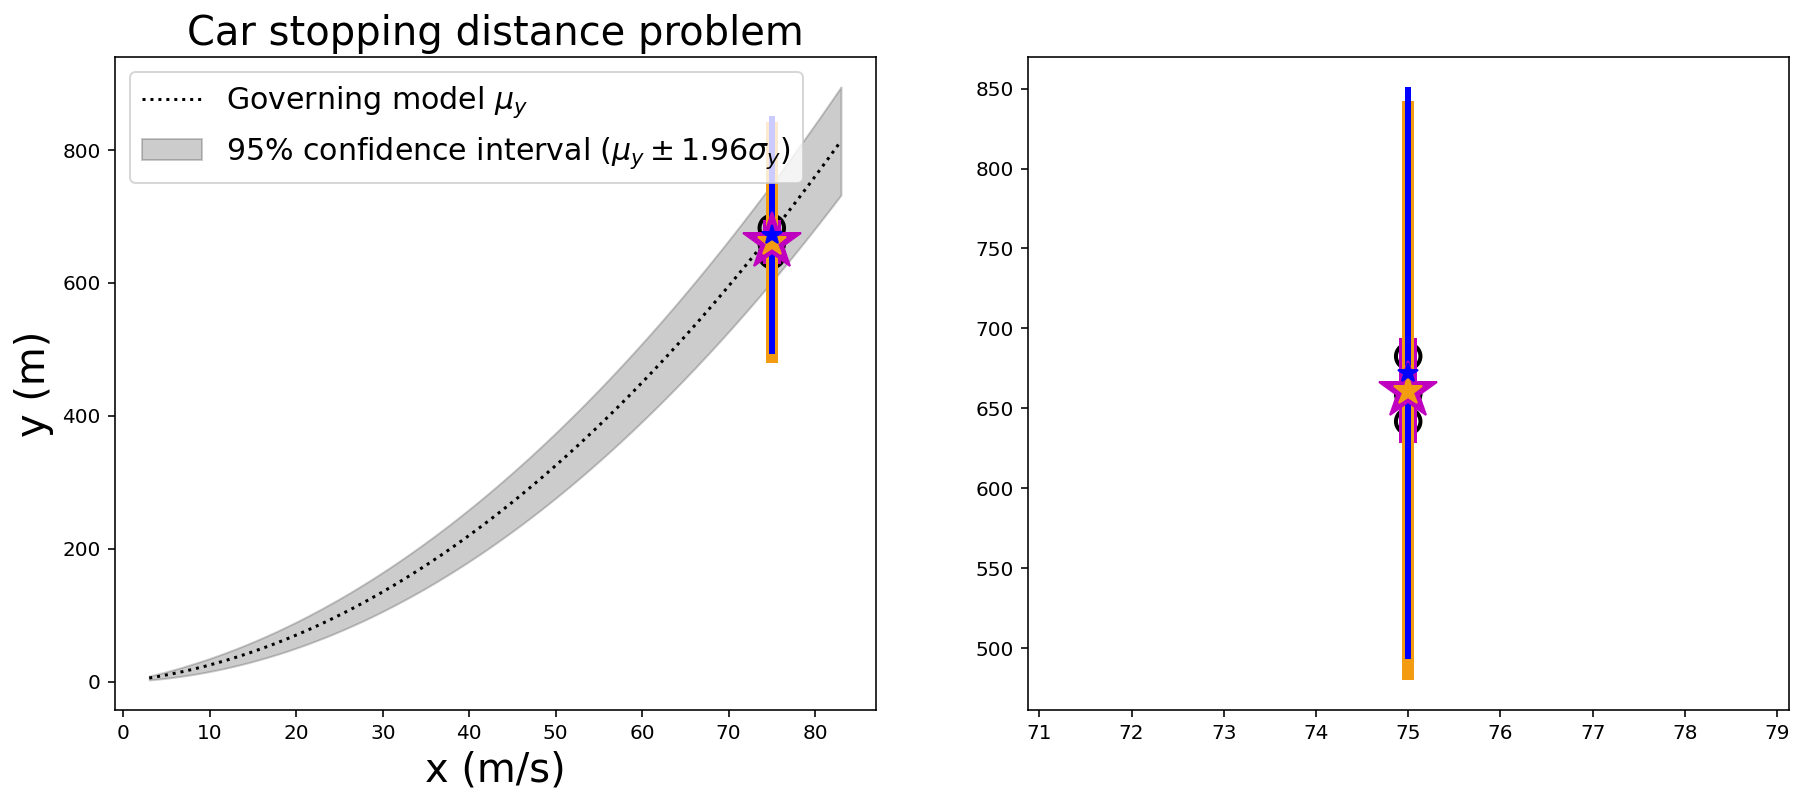

In [5]:
PPD_comparison(N_samples=3) # Plot data and the two PPD's considering different priors

### See you next class

Have fun!